# Implementing logistic regression using TensorFlow


## 1. Generate synthetic data

In [2]:
import numpy as np   
from sklearn import datasets  # import datasets from sklearn
iris = datasets.load_iris() # load iris data set

In [3]:
x_data = iris["data"][:, (2, 3)]  # extracting petal length, petal width values from the third and fouth columns of the 2D array iris['data']
y_data = (iris["target"] == 2).astype(np.int)   # To convert the true and false words into numerical values, i.e., 1s and 0s
y_data = y_data[x_data[:,0]>2.5,]   # only keep the measurements associated with petal length > 2.5
x_data = x_data[x_data[:,0]>2.5,:] 

/tmp/ipykernel_73180/2321151179.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (iris["target"] == 2).astype(np.int)   # To convert the true and false words into numerical values, i.e., 1s and 0s


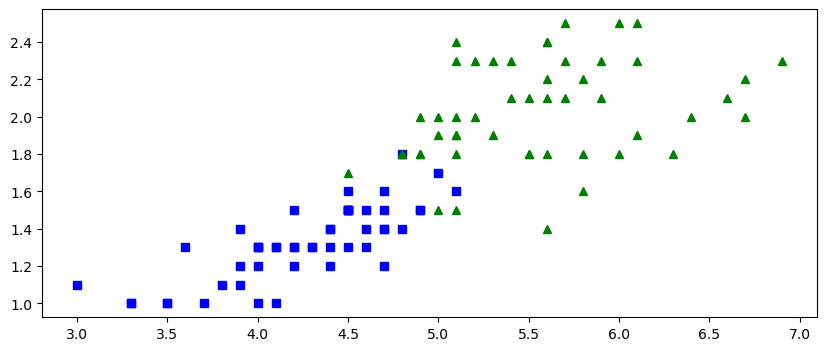

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(x_data[y_data==0, 0], x_data[y_data==0, 1], "bs")
plt.plot(x_data[y_data==1, 0], x_data[y_data==1, 1], "g^")
plt.show()

## 2. Train a logistic regression model in TensorFlow

In [6]:
import tensorflow as tf
# Supress tensorflow warnings as I am only running CPU
TF_CPP_MIN_LOG_LEVEL="2"

In [7]:
tf.random.set_seed(42)

init_w = tf.random.normal((2,1),0,1)  # tf.random.normal(shape, mean=0.0, stddev=1.0)

cost_val = []

w = tf.Variable(init_w, tf.float32,name='weights')
b = tf.Variable(0.1,tf.float32,name='bias')

2022-11-15 13:48:44.562574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 13:48:44.562597: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 13:48:44.562614: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (crumblerworm): /proc/driver/nvidia/version does not exist
2022-11-15 13:48:44.562943: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
x_data_new = tf.cast(x_data,tf.float32)
y_data_new = tf.cast(y_data,tf.float32)
y_data_new = tf.reshape(y_data_new,[100,1])  

In [9]:
learning_rate = 0.1
training_epochs = 10000

In [10]:
for epoch in range(training_epochs):
  with tf.GradientTape(persistent=True) as tape:
      y_linear = tf.matmul(x_data_new,w)+b
      # y_pred = tf.sigmoid(y_linear)
      cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_data_new,logits=y_linear))

  dcost_dw = tape.gradient(cost,w)
  dcost_db = tape.gradient(cost,b)

  w.assign_sub(learning_rate*dcost_dw)
  b.assign_sub(learning_rate*dcost_db)

  cost_val.append(cost)

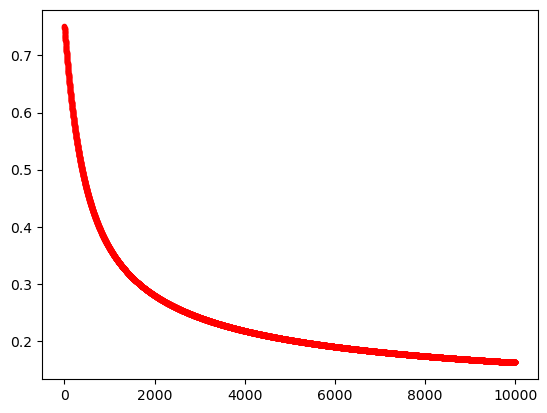

In [11]:
plt.plot(np.arange(training_epochs),cost_val,'-r.')
plt.show()

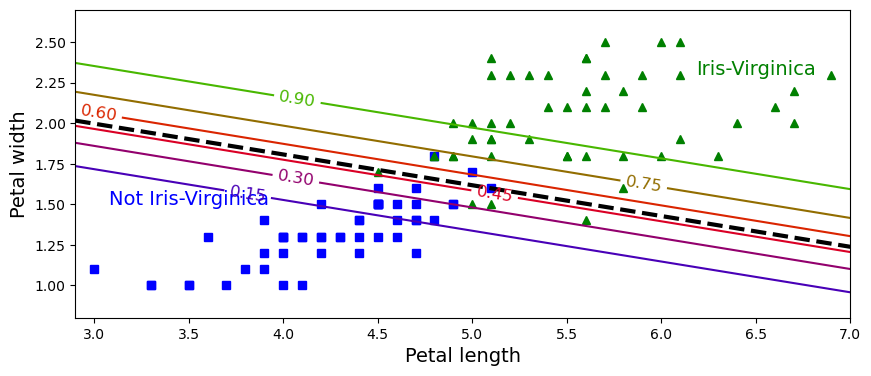

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

w_final = w
b_final = b

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = sigmoid(np.matmul(X_new,w_final)+b_final)

plt.figure(figsize=(10, 4))
plt.plot(x_data[y_data==0, 0], x_data[y_data==0, 1], "bs")
plt.plot(x_data[y_data==1, 0], x_data[y_data==1, 1], "g^")

zz = y_proba.reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(w_final[0] * left_right + b_final) / w_final[1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
#plt.axis([2.9, 7, 0.8, 2.7])
plt.show()